<a href="https://colab.research.google.com/github/jaiswar12344/mlproject/blob/main/Health_costs_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# New Section

In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-06-17 10:41:33--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2024-06-17 10:41:33 (4.69 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [ ]:
for column in dataset:
    if dataset[column].nunique() < 10:
        print(column, "=", pd.unique(dataset[column]))
    else:
        print(column, "have", dataset[column].nunique(), "different values.")

age have 47 different values.
sex = ['female' 'male']
bmi have 275 different values.
children = [0 1 3 2 5 4]
smoker = ['yes' 'no']
region = ['southwest' 'southeast' 'northwest' 'northeast']
expenses have 1337 different values.


In [ ]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

<ipython-input-36-12bfa00c062a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-36-12bfa00c062a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-36-12bfa00c062a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


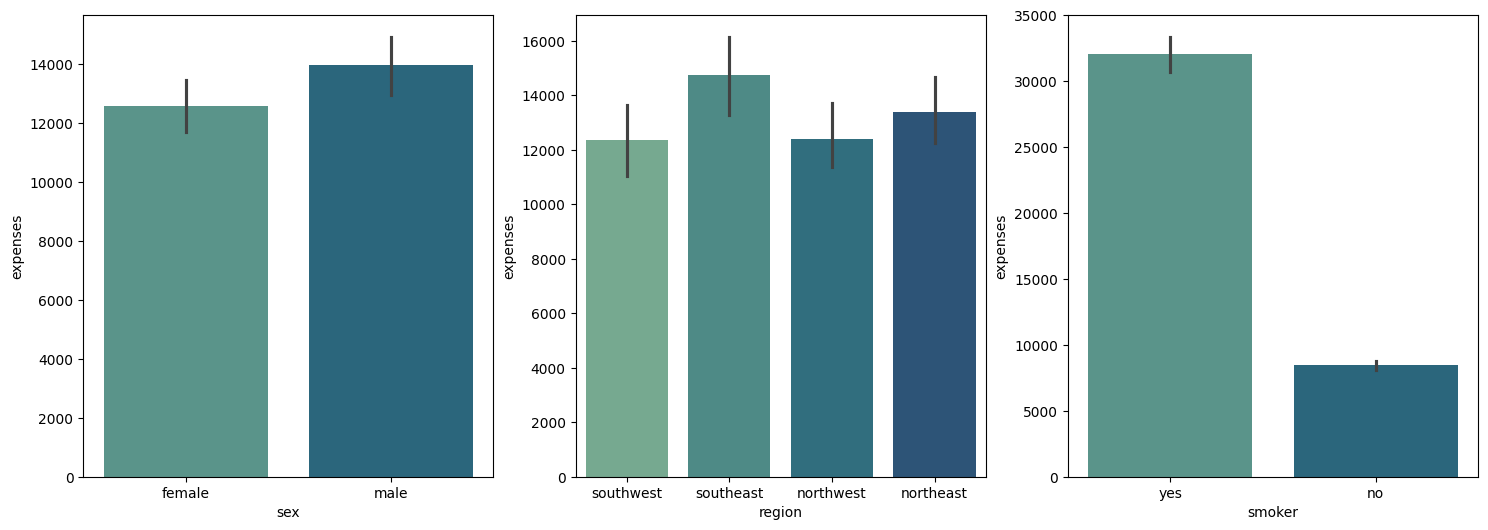

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

i = 1
for column in ['sex', 'region', 'smoker']:
    plt.subplot(1, 3, i)
    ax = sns.barplot(
        data=dataset,
        x=column,
        y='expenses',
        palette="crest"
    )
    i += 1

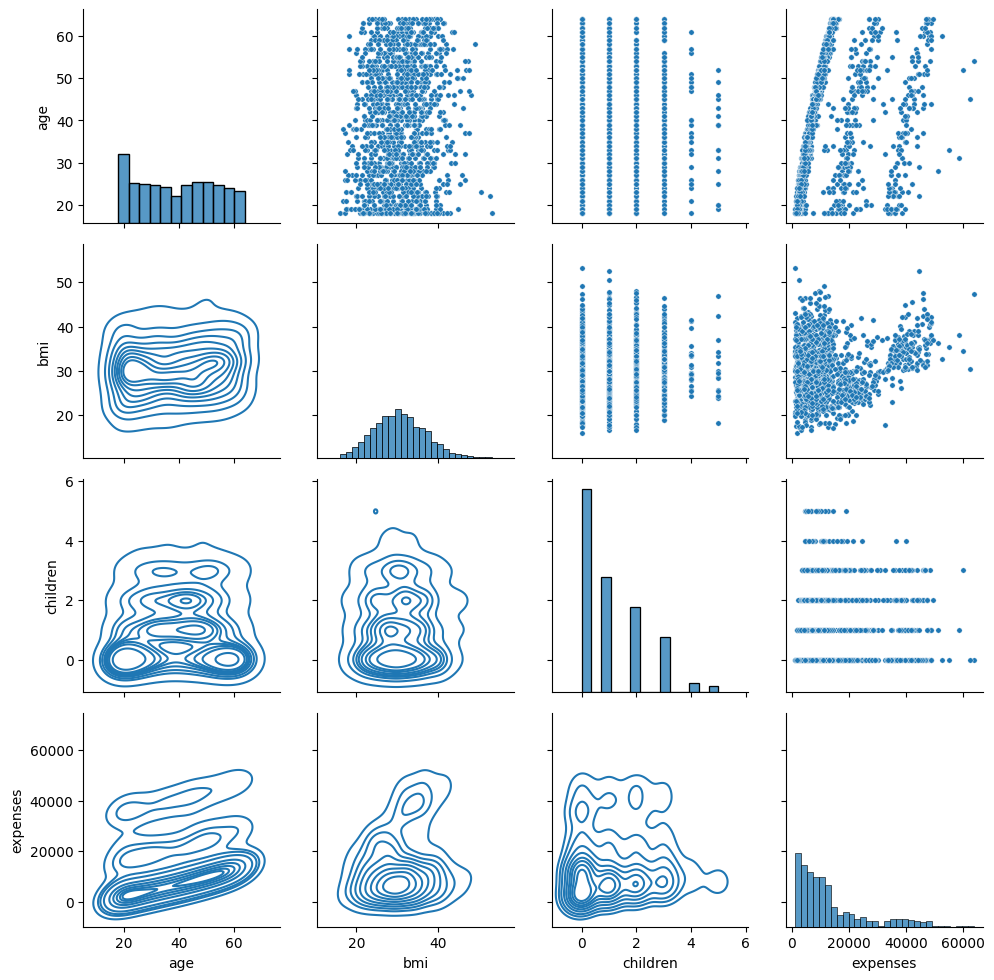

In [ ]:
g = sns.PairGrid(
    dataset[['age', 'bmi', 'children' ,'expenses']]
)
g.map_upper(sns.scatterplot, s=15)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)


In [ ]:
prepared_data = dataset.copy()

In [ ]:
prepared_data['smoker'] = prepared_data['smoker'].map({'no': 0, 'yes': 1})
prepared_data['sex'] = prepared_data['sex'].map({'female': 1, 'male': 0})

In [ ]:
prepared_data = pd.get_dummies(
    prepared_data,
    columns=['region'],
    prefix='',
    prefix_sep=''
)

In [ ]:
prepared_data.tail()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
1333,50,0,31.0,3,0,10600.55,False,True,False,False
1334,18,1,31.9,0,0,2205.98,True,False,False,False
1335,18,1,36.9,0,0,1629.83,False,False,True,False
1336,21,1,25.8,0,0,2007.95,False,False,False,True
1337,61,1,29.1,0,1,29141.36,False,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split

tts_data = prepared_data.copy()

X = tts_data.drop('expenses', axis=1)
y = tts_data.pop('expenses')

train_dataset, test_dataset, train_labels, test_labels = train_test_split(
    X, y,
    test_size=0.2
)

test_dataset.tail()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
444,56,0,26.7,1,1,False,True,False,False
557,34,0,34.2,0,0,False,False,True,False
921,62,1,33.2,0,0,False,False,False,True
693,24,0,23.7,0,0,False,True,False,False
1094,50,1,33.7,4,0,False,False,False,True


In [ ]:
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing

# Assuming train_dataset is your data, convert it to a numpy array if it is not already
train_dataset = np.array(train_dataset)

# Check the data type of the numpy array
print(train_dataset.dtype)

# Ensure the data type is float for the normalization process
if train_dataset.dtype != 'float32' and train_dataset.dtype != 'float64':
    train_dataset = train_dataset.astype('float32')

# Create and adapt the normalizer
normalizer = preprocessing.Normalization()
normalizer.adapt(train_dataset)


object


In [ ]:
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(units=1)
])

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mean_absolute_error'], # Decides about pass the tests from website
    metrics=['mean_absolute_error', 'mean_squared_error']  # mse is required in tests from website
)

In [ ]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=50,
    verbose=0,
)

In [ ]:
test_dataset = np.array(test_dataset)
test_labels = np.array(test_labels)

# Check the data type of the numpy arrays
print(test_dataset.dtype)
print(test_labels.dtype)

if test_dataset.dtype != 'float32' and test_dataset.dtype != 'float64':
    test_dataset = test_dataset.astype('float32')

# Ensure test_labels is of an integer type (for classification tasks)
if test_labels.dtype != 'int32' and test_labels.dtype != 'int64':
    test_labels = test_labels.astype('int32')

# Evaluate the model
model.evaluate(
    test_dataset,
    test_labels,
    verbose=1
)

object
float64
9/9 [==============================] - 0s 3ms/step - loss: 2561.2112 - mean_absolute_error: 2561.2112 - mean_squared_error: 31834584.0000


[2561.211181640625, 2561.211181640625, 31834584.0]

9/9 [==============================] - 0s 3ms/step


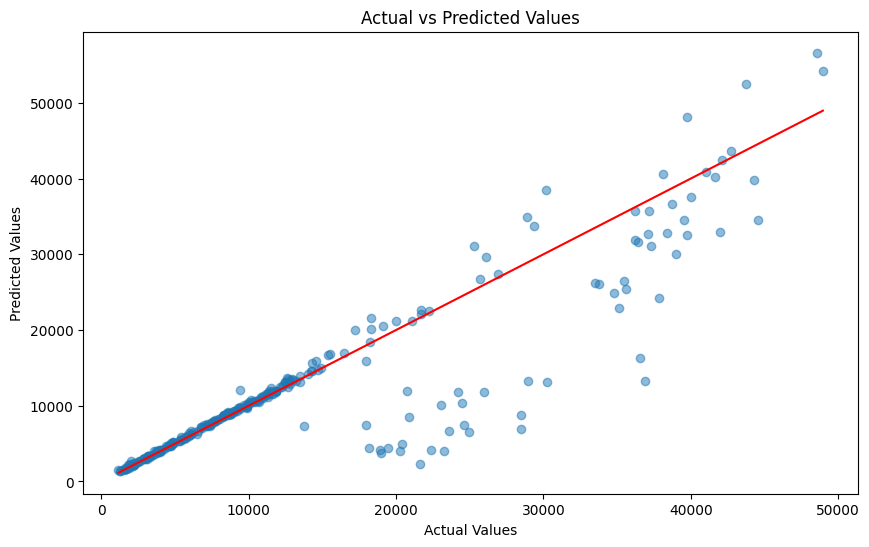

In [ ]:
import matplotlib.pyplot as plt

# Assuming your model and test_dataset are already defined
predictions = model.predict(test_dataset)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red')  # Diagonal line
plt.show()


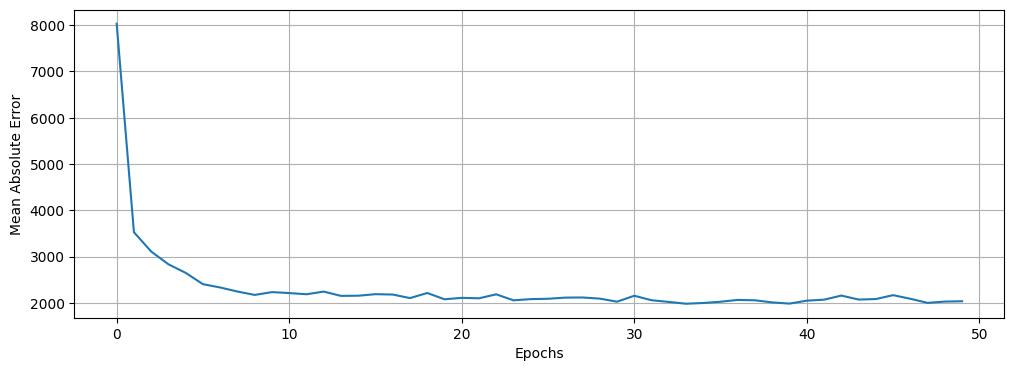

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(
    history.history['mean_absolute_error']
)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.grid(True)
plt.show()

9/9 - 0s - loss: 2561.2112 - mean_absolute_error: 2561.2112 - mean_squared_error: 31834584.0000 - 43ms/epoch - 5ms/step
Testing set Mean Abs Error: 2561.21 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


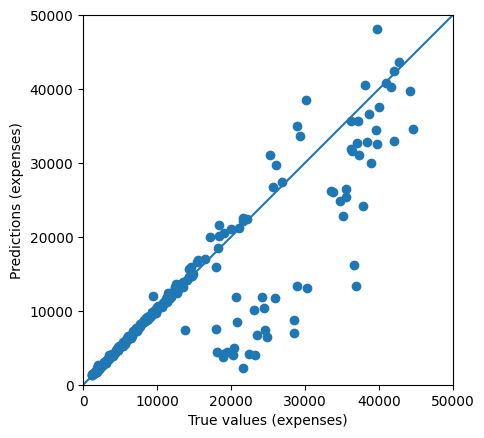

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
